In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble


def quantum_adder_circuit(a, b):
    # Create a quantum circuit with four qubits
    circuit = QuantumCircuit(5, 3)

    # Apply X gates to set the initial values of qubits a and b
    for i in range(len(a)):
        if a[i] == '1':
            circuit.x(i)
    for i in range(len(b)):
        if b[i] == '1':
            circuit.x(len(a) + i)

    # Apply Toffoli gates for the addition logic
    for i in range(len(a) - 1):
        circuit.ccx(i, len(a) + i, len(a) * 2 + i + 1)
        circuit.cx(i, len(a) + i)
        circuit.ccx(i, len(a) + i, len(a) * 2 + i + 1)

    # Apply final Toffoli gate and CX gate
    circuit.ccx(len(a) - 1, len(a) * 2 - 2, len(a) * 2 - 1)
    circuit.cx(len(a) - 1, len(a) * 2 - 2)

    # Measure the result
    for i in range(len(a)):
        circuit.measure(len(a) * 2 + i, i)

    return circuit


# Set binary inputs for addition
input_a = '110'
input_b = '101'

# Create the circuit
adder_circuit = quantum_adder_circuit(input_a, input_b)

# Draw the circuit
print(adder_circuit)

# Use the Aer simulator to simulate the circuit
simulator = Aer.get_backend('aer_simulator')

# Compile and run the quantum circuit
compiled_circuit = transpile(adder_circuit, simulator)
result = simulator.run(compiled_circuit).result()

# Get the measurement result
counts = result.get_counts()
print("Measurement result:", counts)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
import numpy as np

backend = Aer.get_backend('qasm_simulator')

shots = 1024

qc = QuantumCircuit()

q = QuantumRegister(4, 'q')

qc.add_register(q)

qc.x(q[0])
qc.x(q[3])
qc.h(q[0])
qc.crz(np.pi / 2, q[1], q[0])
qc.h(q[1])
qc.crz(np.pi, q[3], q[1])
qc.crz(np.pi / 2, q[3], q[0])
qc.crz(np.pi, q[2], q[0])
qc.h(q[1])
qc.crz(-np.pi / 2, q[1], q[0])
qc.h(q[0])

job = execute(qc, backend=backend, shots=shots)
job_result = job.result()
print(job_result.get_counts(qc))

**HALF ADDER**

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute

a = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(a, c)

backend = Aer.get_backend('qasm_simulator')

# half adder
# 11
qc.x(a[0])
qc.x(a[1])

qc.cx(a[0], a[2])
qc.cx(a[1], a[2])
qc.ccx(a[0], a[1], a[3]) 

# cnot for sum and toffoli gate for carry
# half adder ends

print(qc)
qc.measure(a, c)
# qc.measure_all()
job = execute(qc, backend, shots=1024)
result = job.result()
# Print the results
counts = result.get_counts()
print(counts)

       ┌───┐               
q17_0: ┤ X ├──■─────────■──
       ├───┤  │         │  
q17_1: ┤ X ├──┼────■────■──
       └───┘┌─┴─┐┌─┴─┐  │  
q17_2: ─────┤ X ├┤ X ├──┼──
            └───┘└───┘┌─┴─┐
q17_3: ───────────────┤ X ├
                      └───┘
 c5: 4/════════════════════
                           
{'1011': 1024}


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


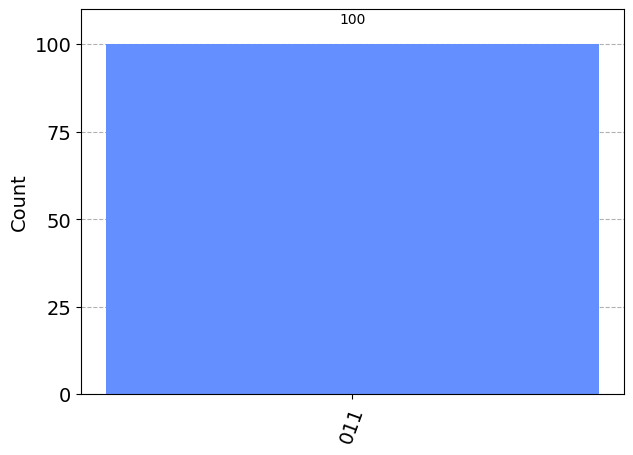

In [ ]:
#This file is to add two numbers in a quantum computer/ simulator using QFT

import numpy as np
import qiskit
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
# from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

# Function to change decimal numbers to Binary numbers and to Qubit states

def change2qubit(a,b):

# Changing to Binary numbers

    a_bin  = '{0:{fill}3b}'.format(a, fill = '0')
    b_bin  = '{0:{fill}3b}'.format(b, fill = '0')
    
# Getting Qubits/ Bits (registers)

    qa = QuantumRegister(3,'a')
    qb = QuantumRegister(3,'b')
    ca = ClassicalRegister(3,'c')
    qc = QuantumCircuit(qa,qb,ca)

# Flipping the state of qubits for '1'

    for i in range(3):
        if a_bin[i] == '1':
            qc.x(qa[2-i])
        if b_bin[i] == '1':
            qc.x(qb[2-i])
    return qc, qa, qb, ca
    
 # Function which adds/ rotates and retains teh answer in the first register
def add_rotations(qc, t_reg, c_reg, n):
    for i in range(0, n+1):
        qc.cp(np.pi/2**i, c_reg[n-i], t_reg[n])
    
a = 1
b = 2
n = 3
qc, qa, qb, ca = change2qubit(a,b)

qc.append(QFT(n,do_swaps = False),[0,1,2])

for i in range(0, n):
    add_rotations(qc, qa, qb, 2-i)

qc.append(QFT(n,do_swaps = False).inverse(),[0,1,2])

qc.measure(qa,ca)
qc.draw('mpl')

backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots = 100)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute

# Define quantum registers
pt = QuantumRegister(6)
key = QuantumRegister(6)
carry = QuantumRegister(6)  # New register for carry qubits
c = ClassicalRegister(6)
qc = QuantumCircuit(pt, key, carry, c)

backend = Aer.get_backend('qasm_simulator')

# Set plaintext (0-5)
for i in range(6):
    qc.x(pt[i])

print('plain text')
# print(qc)
qc.measure(pt,c)
# qc.measure_all()
job = execute(qc, backend, shots=1024)
result = job.result()
# Print the results
counts = result.get_counts()
print(counts)


# Set key
for i in range(3):
    qc.x(key[i])

print('KEY')
qc.measure(key,c)
# qc.measure_all()
job = execute(qc, backend, shots=1024)
result = job.result()
# Print the results
counts = result.get_counts()
print(counts)

# Takahashi Adder
for i in range(5):
    qc.cx(key[i], pt[i+1])
    qc.ccx(pt[i], key[i], carry[i+1])
    qc.cx(carry[i], pt[i+1])

# Measure ciphertext
qc.measure(pt, c)

# Execute the circuit
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

plain text
{'111111': 1024}
KEY
{'000111': 1024}
{'100101': 1024}


In [11]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit.circuit.library import CDKMRippleCarryAdder 
adder = CDKMRippleCarryAdder(3, 'full', 'Full Adder')
operand1 = QuantumRegister(3, 'o1')
operand2 = QuantumRegister(3, 'o2')
anc = QuantumRegister(2, 'a')
cr = ClassicalRegister(4)


circ = QuantumCircuit(operand1, operand2, anc, cr)

# For testing purposes we set 1st operand to equal 3
circ.x([operand1[0], operand1[1]])
# and 2nd operand to equal 5
circ.x([operand2[0], operand2[2]])

# Note 1: CDKMRippleCarryAdder expects the qubits to have the order: carry in - 1st operand - 2nd operand - carry out.
# Note 2: Python uses '+' operator to combine lists:
circ.append(adder, [anc[0]] + operand1[0:3] + operand2[0:3] + [anc[1]])

# The adder writes the result in place of 2nd operand and carry-out: 
circ.measure(operand2[0:3] + [anc[1]], cr)
# circ.draw('mpl')
print(circ)

simulator = Aer.get_backend('qasm_simulator')
tr_circ = transpile(circ, basis_gates = ['u3', 'cx'], optimization_level = 3)
result = simulator.run(tr_circ).result()
counts = result.get_counts()

# The result must be 8 (in binary, 1000)
print(list(counts.keys())[0])

      ┌───┐┌─────────────┐            
o1_0: ┤ X ├┤1            ├────────────
      ├───┤│             │            
o1_1: ┤ X ├┤2            ├────────────
      └───┘│             │            
o1_2: ─────┤3            ├────────────
      ┌───┐│             │┌─┐         
o2_0: ┤ X ├┤4            ├┤M├─────────
      └───┘│  Full Adder │└╥┘┌─┐      
o2_1: ─────┤5            ├─╫─┤M├──────
      ┌───┐│             │ ║ └╥┘┌─┐   
o2_2: ┤ X ├┤6            ├─╫──╫─┤M├───
      └───┘│             │ ║  ║ └╥┘   
 a_0: ─────┤0            ├─╫──╫──╫────
           │             │ ║  ║  ║ ┌─┐
 a_1: ─────┤7            ├─╫──╫──╫─┤M├
           └─────────────┘ ║  ║  ║ └╥┘
c1: 4/═════════════════════╩══╩══╩══╩═
                           0  1  2  3 
1000


In [43]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit.circuit.library import CDKMRippleCarryAdder 

adder = CDKMRippleCarryAdder(6, kind='full', name='Full Adder') # kind='full' indicates full adder
operand1 = QuantumRegister(6, name='o1')
operand2 = QuantumRegister(6, name='o2')
anc = QuantumRegister(2, name='a') # to store carry in and carry out
cr = ClassicalRegister(7)

circ = QuantumCircuit(operand1, operand2, anc, cr)

# let 1st operand be 42 = 101010
plain_text='101010'
for i in range(len(plain_text)):
    if plain_text[i]=='1':
        circ.x(operand1[len(plain_text)-1-i])
        
# let 2nd operand be 51 = 110011
key='110011'
for i in range(len(key)):
    if key[i]=='1':
        circ.x(operand2[len(plain_text)-1-i])
        
# Note 1: CDKMRippleCarryAdder expects the qubits to have the order: carry in - 1st operand - 2nd operand - carry out.
# Note 2: Python uses '+' operator to combine lists:
# circ.append(adder, [anc[0], anc[1]] + operand1[:] + operand2[:] + [anc[2], anc[3]])
circ.append(adder, [anc[0]] + operand1[:] + operand2[:] + [anc[1]])
circ.measure(operand2[:] + [anc[1]], cr)

print(circ)

simulator = Aer.get_backend('qasm_simulator')
tr_circ = transpile(circ, basis_gates = ['u3', 'cx'], optimization_level = 3)
result = simulator.run(tr_circ).result()
counts = result.get_counts()

# The result must be 93 (in binary, 1011101)
print(list(counts.keys())[0])

            ┌──────────────┐                     
 o1_0: ─────┤1             ├─────────────────────
       ┌───┐│              │                     
 o1_1: ┤ X ├┤2             ├─────────────────────
       └───┘│              │                     
 o1_2: ─────┤3             ├─────────────────────
       ┌───┐│              │                     
 o1_3: ┤ X ├┤4             ├─────────────────────
       └───┘│              │                     
 o1_4: ─────┤5             ├─────────────────────
       ┌───┐│              │                     
 o1_5: ┤ X ├┤6             ├─────────────────────
       ├───┤│              │┌─┐                  
 o2_0: ┤ X ├┤7             ├┤M├──────────────────
       ├───┤│   Full Adder │└╥┘┌─┐               
 o2_1: ┤ X ├┤8             ├─╫─┤M├───────────────
       └───┘│              │ ║ └╥┘┌─┐            
 o2_2: ─────┤9             ├─╫──╫─┤M├────────────
            │              │ ║  ║ └╥┘┌─┐         
 o2_3: ─────┤10            ├─╫──╫──╫─┤M├─────────
